In [10]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization,Activation,Reshape,LSTM

In [6]:
def masked_model():
    model = Sequential()

    model.add(Conv2D(128, kernel_size=5,strides=1,padding='same',input_shape=(35, 35, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=3, strides=2, padding='same'))

    model.add(Conv2D(72,kernel_size=3,strides=1,padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=5, strides=4, padding='same'))

    model.add(Conv2D(64,kernel_size=3,strides=1,padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=5, strides=4, padding='same'))

    model.add(Conv2D(64,kernel_size=3,strides=1,padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=4, strides=4, padding='same'))

    model.add(Reshape((-1, 64)))
    # LSTM
    model.add(LSTM(32))
    model.add(Dense(units=1, activation='sigmoid'))
    #
    model.summary()
    return model

In [7]:
model = masked_model()
model.load_weights('model/masked_detection_model.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 35, 35, 128)       9728      
                                                                 
 batch_normalization_4 (Batc  (None, 35, 35, 128)      512       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 35, 35, 128)       0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 18, 18, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 18, 18, 72)        83016     
                                                                 
 batch_normalization_5 (Batc  (None, 18, 18, 72)      

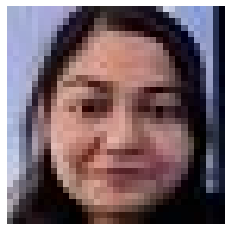

1/1 [==============================] - 0s 14ms/step
With Out Mask


In [11]:
def load_image(img_path, show=False):
    img = image.load_img(img_path, target_size=(35, 35))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor
new_image = load_image('withoutmask.jpg',True)
predictions = model.predict(new_image)
if predictions[0][0]<0.5:
    print("With Mask")
else:
    print("With Out Mask")